In [15]:
import os
import pandas as pd
import numpy
import IPython.display as ipd
import librosa.display

In [8]:
import librosa

In [2]:
sick_path = '/Users/krish/Documents/Audio_Classification/audio/train/sick'
not_sick_path = '/Users/krish/Documents/Audio_Classification/audio/train/not_sick'

In [4]:
sick_files = os.listdir(sick_path)
not_sick_files = os.listdir(not_sick_path)

Populating the interactive namespace from numpy and matplotlib


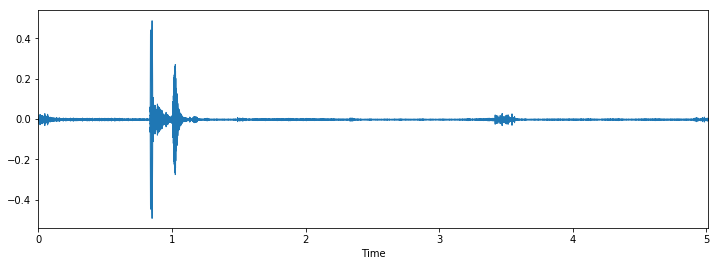

In [20]:
% pylab inline
plt.figure(figsize=(12, 4))
data, sampling_rate = librosa.load(sick_path+'/'+sick_files[5])
librosa.display.waveplot(data, sr=sampling_rate)

Populating the interactive namespace from numpy and matplotlib


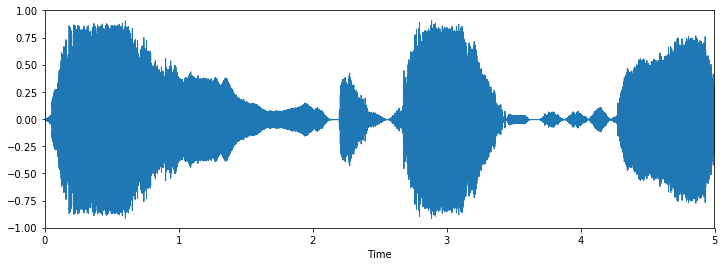

In [21]:
% pylab inline
plt.figure(figsize=(12, 4))
data, sampling_rate = librosa.load(not_sick_path+'/'+not_sick_files[5])
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
def get_class(audio_path):
    return audio_path.split('/')[-2]

In [33]:
dir = '/Users/krish/Documents/Audio_Classification/audio/train/'
file_name = glob.glob(os.path.join(dir,'*/*.wav'))

In [ ]:
import glob
all_audio_paths = glob.glob(os.path.join(dir,'*/*.wav'))

In [71]:
feature = []
label = []

In [72]:
for i in file_name:
    X, sample_rate = librosa.load(i, res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    feature.append(mfccs)
    label.append(get_class(i)) 

In [75]:
X = np.asarray(feature)
y = np.asarray(label)

In [77]:
from keras.utils.np_utils import to_categorical

In [78]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))

In [79]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

In [80]:
num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [83]:
model.fit(X, y, batch_size=32, epochs=50,validation_split=0.2)

Train on 2972 samples, validate on 744 samples
Epoch 1/50
2972/2972 [==============================] - 0s 88us/step - loss: 6.2961 - acc: 0.5979 - val_loss: 5.0271 - val_acc: 0.6788
Epoch 2/50
2972/2972 [==============================] - 0s 72us/step - loss: 6.5889 - acc: 0.5801 - val_loss: 12.0852 - val_acc: 0.2392
Epoch 3/50
2972/2972 [==============================] - 0s 78us/step - loss: 6.6830 - acc: 0.5791 - val_loss: 0.0217 - val_acc: 0.9987
Epoch 4/50
2972/2972 [==============================] - 0s 73us/step - loss: 7.3163 - acc: 0.5421 - val_loss: 4.8553 - val_acc: 0.6922
Epoch 5/50
2972/2972 [==============================] - 0s 75us/step - loss: 6.1778 - acc: 0.6100 - val_loss: 8.2284 - val_acc: 0.4798
Epoch 6/50
2972/2972 [==============================] - 0s 80us/step - loss: 6.3859 - acc: 0.5986 - val_loss: 11.1123 - val_acc: 0.3038
Epoch 7/50
2972/2972 [==============================] - 0s 77us/step - loss: 6.0478 - acc: 0.6168 - val_loss: 4.5496 - val_acc: 0.7124
Epoch 